In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn
pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv("hotel_booking.csv",encoding="utf-8")

In [3]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
diccionario = pd.read_csv("diccionario_datos P2 hotel booking - features.csv",encoding="utf-8")

In [5]:
diccionario

,description,feature,Descripción
0,The datasets contains the booking information ...,hotel,Los conjuntos de datos contienen la informació...
1,Value indicating if the booking was canceled (...,is_canceled,Valor que indica si la reserva fue cancelada (...
2,Number of days that elapsed between the enteri...,lead_time,Número de días transcurridos entre la fecha de...
3,Year of arrival date,arrival_date_year,Año de la fecha de llegada
4,Month of arrival date with 12 categories: “Jan...,arrival_date_month,Mes de la fecha de llegada con 12 categorías: ...
5,Week number of the arrival date,arrival_date_week_number,Número de semana de la fecha de llegada
6,Day of the month of the arrival date,arrival_date_day_of_month,Día del mes de la fecha de llegada
7,Number of weekend nights (Saturday or Sunday) ...,stays_in_weekend_nights,Número de noches de fin de semana (sábado o do...
8,Number of week nights (Monday to Friday) the g...,stays_in_week_nights,Número de noches de la semana (de lunes a vier...
9,Number of adults,adults,Número de Adultos


In [6]:
diccionario_ = {}
feature = list(diccionario["feature"])
description = list(diccionario["Descripción"])
diccionario_ = dict(zip(feature,description))
diccionario_

{'hotel': 'Los conjuntos de datos contienen la información de reserva de dos hoteles. Uno de los hoteles es un hotel resort y el otro es un hotel urbano.',
 'is_canceled': 'Valor que indica si la reserva fue cancelada (1) o no (0).',
 'lead_time': 'Número de días transcurridos entre la fecha de entrada de la reserva en el PMS y la fecha de llegada.',
 'arrival_date_year': 'Año de la fecha de llegada',
 'arrival_date_month': 'Mes de la fecha de llegada con 12 categorías: "enero" a "diciembre"',
 'arrival_date_week_number': 'Número de semana de la fecha de llegada',
 'arrival_date_day_of_month': 'Día del mes de la fecha de llegada',
 'stays_in_weekend_nights': 'Número de noches de fin de semana (sábado o domingo) que el huésped se hospedó o reservó para alojarse en el hotel',
 'stays_in_week_nights': 'Número de noches de la semana (de lunes a viernes) que el huésped se hospedó o reservó para alojarse en el hotel BO y BL / Calculado contando el número de noches de la semana',
 'adults': '

In [7]:
objetivo = ["is_cancelled"]

In [8]:
data.shape

(119390, 36)

In [9]:
data.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
data["agent"].value_counts(1,dropna=False)

9.0      0.267702
NaN      0.136862
240.0    0.116609
1.0      0.060231
14.0     0.030488
           ...   
280.0    0.000008
285.0    0.000008
289.0    0.000008
265.0    0.000008
497.0    0.000008
Name: agent, Length: 334, dtype: float64

In [12]:
data["agent"].value_counts(0,dropna=False)

9.0      31961
NaN      16340
240.0    13922
1.0       7191
14.0      3640
         ...  
280.0        1
285.0        1
289.0        1
265.0        1
497.0        1
Name: agent, Length: 334, dtype: int64

In [13]:
data["agent"].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

# Ingenieria de Variables y Tratamiento de los datos

De las 36 variables iniciales, vamos a eliminar 4 que no tienen alguna relevancia dado que son datos unicos y que no dan informacion para algún modelo, estas variables son:
* name
* email
* phone-number
* credit_card

In [14]:
data = data.drop(["name", "email","phone-number","credit_card"],axis=1)
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
def missing_zero_values_table(df):

        zero_val = (df == 0.00).astype(int).sum(axis=0)

        mis_val = df.isnull().sum()

        mis_val_percent = 100 * df.isnull().sum() / len(df)

        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)

        mz_table = mz_table.rename(

        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})

        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']

        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)

        mz_table['Data Type'] = df.dtypes

        mz_table = mz_table[

            mz_table.iloc[:,1] != 0].sort_values(

        '% of Total Values', ascending=False).round(1)

        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      

            "There are " + str(mz_table.shape[0]) +

              " columns that have missing values.")

        return mz_table
    
missing_zero_values_table(data)

Your selected dataframe has 32 columns and 119390 Rows.
There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
company,0,112593,94.3,112593,94.3,float64
agent,0,16340,13.7,16340,13.7,float64
country,0,488,0.4,488,0.4,object
children,110796,4,0.0,110800,92.8,float64


<AxesSubplot:>

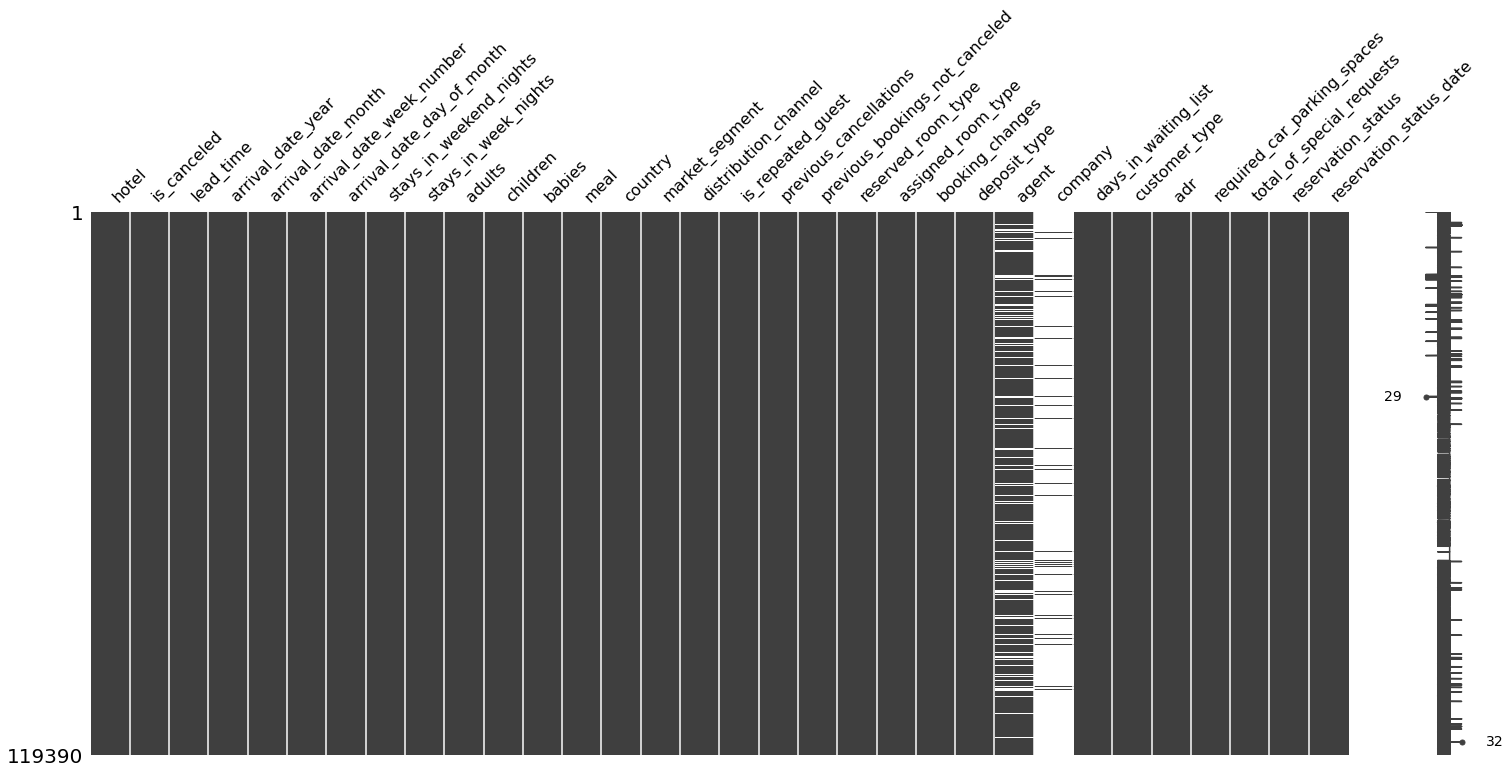

In [16]:
import missingno as msno
msno.matrix(data)

Hacemos el tratamiento de los missings

In [17]:
#Compañia
data["company"].unique() #Vemos los valores de DNI que toma la compañia

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [18]:
data["company"].dtype

dtype('float64')

In [19]:
data["company"]=data["company"].fillna("No DNI company") #Re categorizamos los nulos
data["company"].unique()

array(['No DNI company', 110.0, 113.0, 270.0, 178.0, 240.0, 154.0, 144.0,
       307.0, 268.0, 59.0, 204.0, 312.0, 318.0, 94.0, 174.0, 274.0, 195.0,
       223.0, 317.0, 281.0, 118.0, 53.0, 286.0, 12.0, 47.0, 324.0, 342.0,
       373.0, 371.0, 383.0, 86.0, 82.0, 218.0, 88.0, 31.0, 397.0, 392.0,
       405.0, 331.0, 367.0, 20.0, 83.0, 416.0, 51.0, 395.0, 102.0, 34.0,
       84.0, 360.0, 394.0, 457.0, 382.0, 461.0, 478.0, 386.0, 112.0,
       486.0, 421.0, 9.0, 308.0, 135.0, 224.0, 504.0, 269.0, 356.0, 498.0,
       390.0, 513.0, 203.0, 263.0, 477.0, 521.0, 169.0, 515.0, 445.0,
       337.0, 251.0, 428.0, 292.0, 388.0, 130.0, 250.0, 355.0, 254.0,
       543.0, 531.0, 528.0, 62.0, 120.0, 42.0, 81.0, 116.0, 530.0, 103.0,
       39.0, 16.0, 92.0, 61.0, 501.0, 165.0, 291.0, 290.0, 43.0, 325.0,
       192.0, 108.0, 200.0, 465.0, 287.0, 297.0, 490.0, 482.0, 207.0,
       282.0, 437.0, 225.0, 329.0, 272.0, 28.0, 77.0, 338.0, 72.0, 246.0,
       319.0, 146.0, 159.0, 380.0, 323.0, 511.0, 407.0, 2

In [20]:
data["company"].dtype

dtype('O')

In [21]:
#Agencia
data["agent"]=data["agent"].fillna("No DNI agent") #Recategorizamos los nulos de Agencia
data["agent"].unique()

array(['No DNI agent', 304.0, 240.0, 303.0, 15.0, 241.0, 8.0, 250.0,
       115.0, 5.0, 175.0, 134.0, 156.0, 243.0, 242.0, 3.0, 105.0, 40.0,
       147.0, 306.0, 184.0, 96.0, 2.0, 127.0, 95.0, 146.0, 9.0, 177.0,
       6.0, 143.0, 244.0, 149.0, 167.0, 300.0, 171.0, 305.0, 67.0, 196.0,
       152.0, 142.0, 261.0, 104.0, 36.0, 26.0, 29.0, 258.0, 110.0, 71.0,
       181.0, 88.0, 251.0, 275.0, 69.0, 248.0, 208.0, 256.0, 314.0, 126.0,
       281.0, 273.0, 253.0, 185.0, 330.0, 334.0, 328.0, 326.0, 321.0,
       324.0, 313.0, 38.0, 155.0, 68.0, 335.0, 308.0, 332.0, 94.0, 348.0,
       310.0, 339.0, 375.0, 66.0, 327.0, 387.0, 298.0, 91.0, 245.0, 385.0,
       257.0, 393.0, 168.0, 405.0, 249.0, 315.0, 75.0, 128.0, 307.0, 11.0,
       436.0, 1.0, 201.0, 183.0, 223.0, 368.0, 336.0, 291.0, 464.0, 411.0,
       481.0, 10.0, 154.0, 468.0, 410.0, 390.0, 440.0, 495.0, 492.0,
       493.0, 434.0, 57.0, 531.0, 420.0, 483.0, 526.0, 472.0, 429.0, 16.0,
       446.0, 34.0, 78.0, 139.0, 252.0, 270.0, 47.0, 

In [22]:
#País
data["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [23]:
data["country"]=data["country"].fillna("No country") #Recategorizamos
data["country"].value_counts(dropna=False)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64

In [24]:
data["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'No country', 'ROU',
       'NOR', 'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC',
       'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA',
       'FIN', 'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX',
       'MAR', 'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR',
       'LTU', 'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE',
       'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG',
       'IRN', 'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL',
       'GGY', 'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK',
       'IDN', 'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA',
       'DOM', 'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH',
       'MUS', 'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP',
       'BDI', 'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI',
       'ECU', 'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN',
       'DJI', 'STP', 

In [25]:
#Niños
data["children"].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [26]:
data["children"].dtype

dtype('float64')

In [27]:
data["children"].value_counts(dropna=False)

0.0     110796
1.0       4861
2.0       3652
3.0         76
NaN          4
10.0         1
Name: children, dtype: int64

In [28]:
data["children"]=data["children"].fillna(0) #Agrupamos en 0 los nulos dado que es el valor con mayor frecuencia

In [29]:
data["children"].value_counts(dropna=False)

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

Checamos que ya no tengamos datos nulos

In [30]:
missing_zero_values_table(data)

Your selected dataframe has 32 columns and 119390 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


<AxesSubplot:>

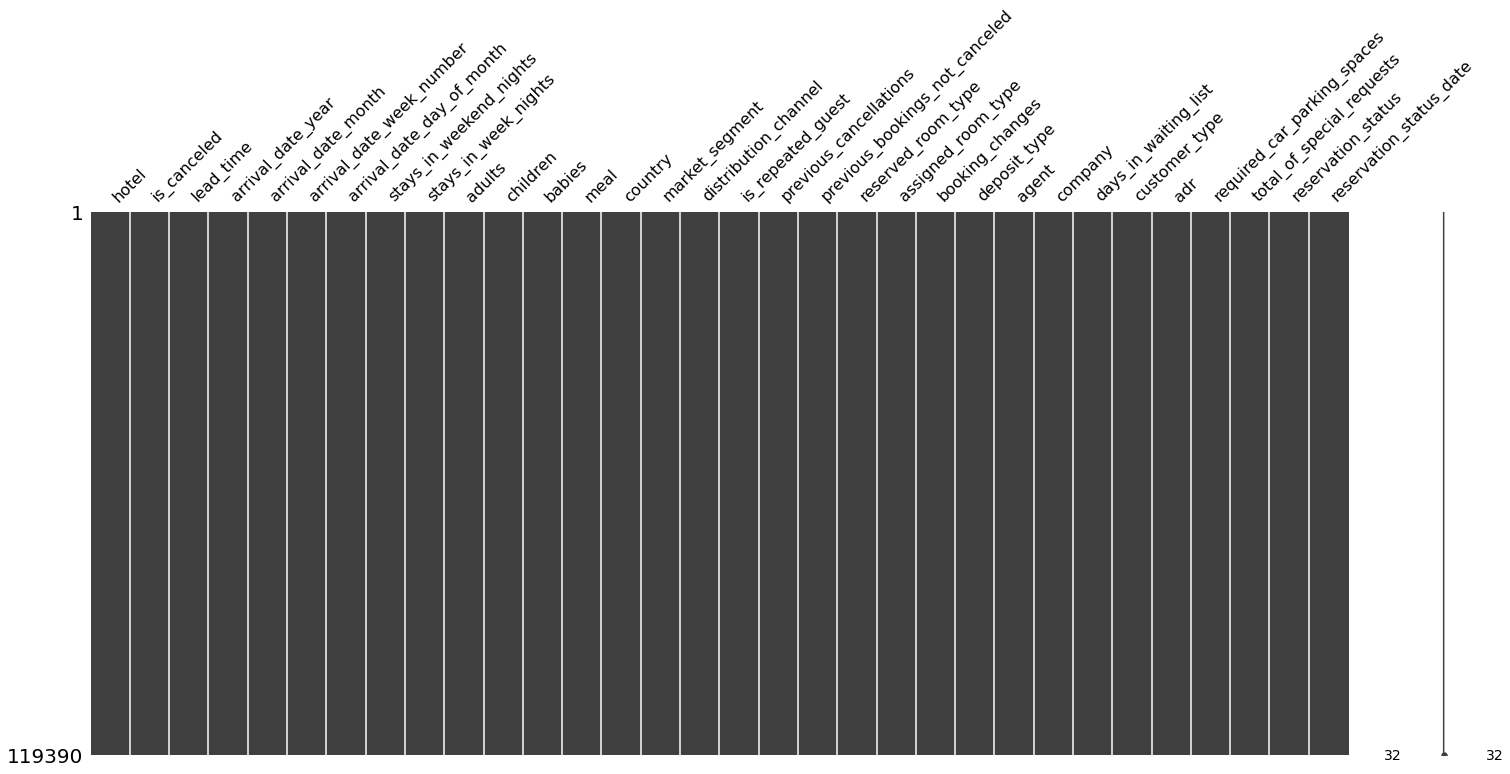

In [31]:
msno.matrix(data)

Una vez que tratamos los datos nulos, veamos si los valores de cada variable hacen sentido, si no para hacer ajustes en ellas

In [32]:
for c in data.columns:
    print(c+"\n")
    print(data[c].unique())
    print("\n")

hotel

['Resort Hotel' 'City Hotel']


is_canceled

[0 1]


lead_time

[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 

Con lo anterior podemos darnos cuenta que los valores hacen sentido, solamente en donde variables cambiaremos los valores para darle mayor entendimiento en nuestro analisis, estas son:
* country donde con un diccionario cambiaremos el codigo iso al nombre real del país
* meal donde pondremos el significado de cada valor

In [33]:
#Country
country = pd.read_csv("country.csv",encoding="utf-8")
country.head(5)

,Pais,ISO2,ISO3
0,Afganistán,AF,AFG
1,Islas de Åland,AX,ALA
2,Albania,AL,ALB
3,Argelia,DZ,DZA
4,Samoa Americana,AS,ASM


In [34]:
country_dic =dict(zip(country["ISO2"],country["Pais"]))
country_dic.update(dict(zip(country["ISO3"],country["Pais"])))

country_dic

{'AF': 'Afganistán',
 'AX': 'Islas de Åland',
 'AL': 'Albania',
 'DZ': 'Argelia',
 'AS': 'Samoa Americana',
 'AD': 'Andorra',
 'AO': 'Angola',
 'AI': 'Anguila',
 'AQ': 'Antártida',
 'AG': 'Antigua y Barbuda',
 'AR': 'Argentina',
 'AM': 'Armenia',
 'AW': 'Aruba',
 'AU': 'Australia',
 'AT': 'Austria',
 'AZ': 'Azerbaiyán',
 'BS': 'Bahamas',
 'BH': 'Baréin',
 'BD': 'Bangladesh',
 'BB': 'Barbados',
 'BY': 'Bielorrusia',
 'BE': 'Bélgica',
 'BZ': 'Belice',
 'BJ': 'Benín',
 'BM': 'Bermuda',
 'BT': 'Bután',
 'BO': 'Bolivia',
 'BQ': 'Bonaire, San Eustaquio y Saba',
 'BA': 'Bosnia y Herzegovina',
 'BW': 'Botsuana',
 'BV': 'Isla Bouvet',
 'BR': 'Brasil',
 'IO': 'Territorio Británico del Océano Índico',
 'VG': 'Islas Vírgenes Británicas',
 'BN': 'Brunei',
 'BG': 'Bulgaria',
 'BF': 'Burkina Faso',
 'BI': 'Burundi',
 'KH': 'Camboya',
 'CM': 'Camerún',
 'CA': 'Canadá',
 'CV': 'Cabo Verde',
 'KY': 'Islas Caimán',
 'CF': 'República de África Central',
 'TD': 'Chad',
 'CL': 'Chile',
 'CN': 'China',
 'CX'

In [35]:
country_dic["No country"]="No country"
country_dic

{'AF': 'Afganistán',
 'AX': 'Islas de Åland',
 'AL': 'Albania',
 'DZ': 'Argelia',
 'AS': 'Samoa Americana',
 'AD': 'Andorra',
 'AO': 'Angola',
 'AI': 'Anguila',
 'AQ': 'Antártida',
 'AG': 'Antigua y Barbuda',
 'AR': 'Argentina',
 'AM': 'Armenia',
 'AW': 'Aruba',
 'AU': 'Australia',
 'AT': 'Austria',
 'AZ': 'Azerbaiyán',
 'BS': 'Bahamas',
 'BH': 'Baréin',
 'BD': 'Bangladesh',
 'BB': 'Barbados',
 'BY': 'Bielorrusia',
 'BE': 'Bélgica',
 'BZ': 'Belice',
 'BJ': 'Benín',
 'BM': 'Bermuda',
 'BT': 'Bután',
 'BO': 'Bolivia',
 'BQ': 'Bonaire, San Eustaquio y Saba',
 'BA': 'Bosnia y Herzegovina',
 'BW': 'Botsuana',
 'BV': 'Isla Bouvet',
 'BR': 'Brasil',
 'IO': 'Territorio Británico del Océano Índico',
 'VG': 'Islas Vírgenes Británicas',
 'BN': 'Brunei',
 'BG': 'Bulgaria',
 'BF': 'Burkina Faso',
 'BI': 'Burundi',
 'KH': 'Camboya',
 'CM': 'Camerún',
 'CA': 'Canadá',
 'CV': 'Cabo Verde',
 'KY': 'Islas Caimán',
 'CF': 'República de África Central',
 'TD': 'Chad',
 'CL': 'Chile',
 'CN': 'China',
 'CX'

In [36]:
data["country"].value_counts(dropna=False)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64

In [37]:
data["country"]=data["country"].map(country_dic)
data["country"].value_counts(dropna=False)

Portugal                     48590
Reino Unido                  12129
Francia                      10415
España                        8568
Alemania                      7287
                             ...  
Yibuti                           1
Botsuana                         1
Honduras                         1
Islas Vírgenes Británicas        1
Namibia                          1
Name: country, Length: 177, dtype: int64

In [38]:
data["country"].unique()

array(['Portugal', 'Reino Unido', 'Estados Unidos (USA)', 'España',
       'Irlanda', 'Francia', 'No country', 'Rumanía', 'Noruega', 'Omán',
       'Argentina', 'Polonia', 'Alemania', 'Bélgica', 'Suiza', 'China',
       'Grecia', 'Italia', 'Países Bajos', 'Dinamarca', 'Rusia', 'Suecia',
       'Australia', 'Estonia', 'República Checa', 'Brasil', 'Finlandia',
       'Mozambique', 'Botsuana', 'Luxemburgo', 'Eslovenia', 'Albania',
       'India', 'México', 'Marruecos', 'Ucrania', 'San Marino', 'Letonia',
       'Puerto Rico', 'Serbia', 'Chile', 'Austria', 'Bielorrusia',
       'Lituania', 'Turquía', 'Sudáfrica', 'Angola', 'Israel',
       'Islas Caimán', 'Zambia', 'Cabo Verde', 'Zimbabue', 'Argelia',
       'Corea del Sur', 'Costa Rica', 'Hungría', 'Emiratos Árabes Unidos',
       'Túnez', 'Jamaica', 'Croacia', 'Hong Kong', 'Irán', 'Georgia',
       'Andorra', 'Gibraltar', 'Uruguay', 'Jersey',
       'República de África Central', 'Chipre', 'Colombia', 'Guernsey',
       'Kuwait', 'Nigeri

In [39]:
data.loc[data["country"].isnull()] #No se detecto el codigo TMP 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
61458,City Hotel,1,45,2016,December,51,12,1,3,2,0.0,0,BB,NaN,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,No DNI company,0,Transient,96.9,0,2,Canceled,2016-11-24
81331,City Hotel,0,67,2015,December,49,5,2,1,3,0.0,0,SC,NaN,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,8.0,No DNI company,0,Transient,130.4,0,2,Check-Out,2015-12-08
91991,City Hotel,0,41,2016,June,27,27,1,1,2,2.0,0,BB,NaN,Online TA,TA/TO,0,0,0,F,F,1,No Deposit,9.0,No DNI company,0,Transient,189.9,1,3,Check-Out,2016-06-29


In [40]:
data["country"]=data["country"].fillna("TMP")

In [41]:
data["country"].isnull().any()

False

In [42]:
data.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
company                           False


In [43]:
#meal
data["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [44]:
data["meal"].value_counts(dropna=False)

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [45]:
meal_dic = {"BB": "Alojamiento y desayuno","HB":"Media pensión","FB":"Pensión completa","SC":"Autoservicio",
           "AI":"Todo Incluido","RO":"Solo Alojamiento","Undefined":"No definido"}

In [46]:
meal_dic

{'BB': 'Alojamiento y desayuno',
 'HB': 'Media pensión',
 'FB': 'Pensión completa',
 'SC': 'Autoservicio',
 'AI': 'Todo Incluido',
 'RO': 'Solo Alojamiento',
 'Undefined': 'No definido'}

In [47]:
data["meal"]=data["meal"].map(meal_dic)
data["meal"].unique()

array(['Alojamiento y desayuno', 'Pensión completa', 'Media pensión',
       'Autoservicio', 'No definido'], dtype=object)

In [48]:
data["meal"].value_counts(dropna=False)

Alojamiento y desayuno    92310
Media pensión             14463
Autoservicio              10650
No definido                1169
Pensión completa            798
Name: meal, dtype: int64

In [49]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,Alojamiento y desayuno,Portugal,Direct,Direct,0,0,0,C,C,3,No Deposit,No DNI agent,No DNI company,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,Alojamiento y desayuno,Portugal,Direct,Direct,0,0,0,C,C,4,No Deposit,No DNI agent,No DNI company,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,Alojamiento y desayuno,Reino Unido,Direct,Direct,0,0,0,A,C,0,No Deposit,No DNI agent,No DNI company,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,Alojamiento y desayuno,Reino Unido,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,No DNI company,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,Alojamiento y desayuno,Reino Unido,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,No DNI company,0,Transient,98.0,0,1,Check-Out,2015-07-03
